In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
df= sm.datasets.fair.load_pandas().data
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [3]:
 df['affair'] = (df.affairs > 0).astype(int)
for column in df.columns:
    df[column]=df[column].astype(int)

In [4]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3,32,9,3,3,17,2,5,0,1
1,3,27,13,3,1,14,3,4,3,1
2,4,22,2,0,1,16,3,5,1,1
3,4,37,16,4,3,16,5,5,0,1
4,5,27,9,1,1,14,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...
6361,5,32,13,2,3,17,4,3,0,0
6362,4,32,13,1,1,16,5,5,0,0
6363,5,22,2,0,2,14,3,1,0,0
6364,5,32,6,1,3,14,3,4,0,0


In [5]:
df.drop(columns=['affairs'],inplace=True)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3,32,9,3,3,17,2,5,1
1,3,27,13,3,1,14,3,4,1
2,4,22,2,0,1,16,3,5,1
3,4,37,16,4,3,16,5,5,1
4,5,27,9,1,1,14,3,4,1


In [6]:
occup={1:'occu_1',2:'occu_2',3:'occu_3',4:'occu_4',5:'occu_5',6:'occu_6'}


In [7]:
df1=df.copy()
df1.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3,32,9,3,3,17,2,5,1
1,3,27,13,3,1,14,3,4,1
2,4,22,2,0,1,16,3,5,1
3,4,37,16,4,3,16,5,5,1
4,5,27,9,1,1,14,3,4,1


In [8]:
df1['occup']=df1['occupation'].map(occup)
df1['occup_husb']=df1['occupation_husb'].map(occup)
df1['affairs']=df1['affair'].apply(lambda x:"Yes" if x==1 else "No")
df1.head()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair,occup,occup_husb,affairs
0,3,32,9,3,3,17,2,5,1,occu_2,occu_5,Yes
1,3,27,13,3,1,14,3,4,1,occu_3,occu_4,Yes
2,4,22,2,0,1,16,3,5,1,occu_3,occu_5,Yes
3,4,37,16,4,3,16,5,5,1,occu_5,occu_5,Yes
4,5,27,9,1,1,14,3,4,1,occu_3,occu_4,Yes


In [9]:
df1.drop(columns=['occupation','occupation_husb','affair'],inplace=True)
df1.head()

,rate_marriage,age,yrs_married,children,religious,educ,occup,occup_husb,affairs
0,3,32,9,3,3,17,occu_2,occu_5,Yes
1,3,27,13,3,1,14,occu_3,occu_4,Yes
2,4,22,2,0,1,16,occu_3,occu_5,Yes
3,4,37,16,4,3,16,occu_5,occu_5,Yes
4,5,27,9,1,1,14,occu_3,occu_4,Yes


In [10]:
table=pd.crosstab(df1['occup'],df1['affairs']).values
table

array([[  34,    7],
       [ 607,  252],
       [1818,  965],
       [1354,  480],
       [ 431,  309],
       [  69,   40]], dtype=int64)

In [11]:
result=stats.chi2_contingency(table)[1]
result

2.477892436591016e-15

In [12]:
table=pd.crosstab(df1['occup_husb'],df1['affairs']).values
result=stats.chi2_contingency(table)[1]
result

0.0024564278771048156

In [13]:
df1.corr()

,rate_marriage,age,yrs_married,children,religious,educ
rate_marriage,1.000000,-0.111164,-0.130189,-0.131083,0.078794,0.079869
age,-0.111164,1.000000,0.892957,0.677503,0.136331,0.029066
yrs_married,-0.130189,0.892957,1.000000,0.778395,0.131568,-0.107169
children,-0.131083,0.677503,0.778395,1.000000,0.141760,-0.143294
religious,0.078794,0.136331,0.131568,0.141760,1.000000,0.032245
educ,0.079869,0.029066,-0.107169,-0.143294,0.032245,1.000000


In [14]:
df1.head()

,rate_marriage,age,yrs_married,children,religious,educ,occup,occup_husb,affairs
0,3,32,9,3,3,17,occu_2,occu_5,Yes
1,3,27,13,3,1,14,occu_3,occu_4,Yes
2,4,22,2,0,1,16,occu_3,occu_5,Yes
3,4,37,16,4,3,16,occu_5,occu_5,Yes
4,5,27,9,1,1,14,occu_3,occu_4,Yes


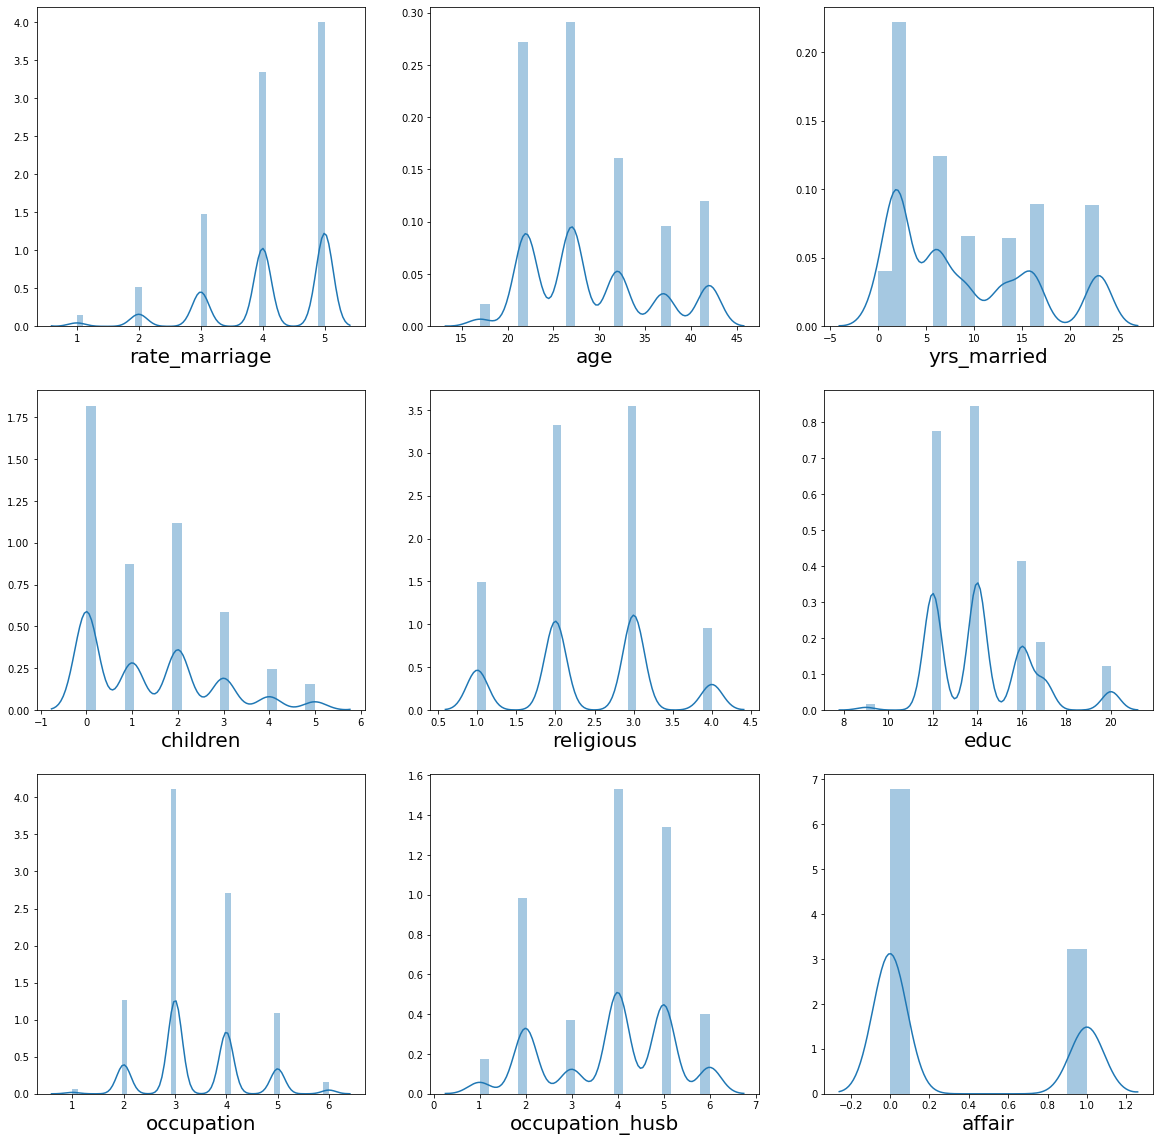

In [15]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=df.shape[1]:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
        

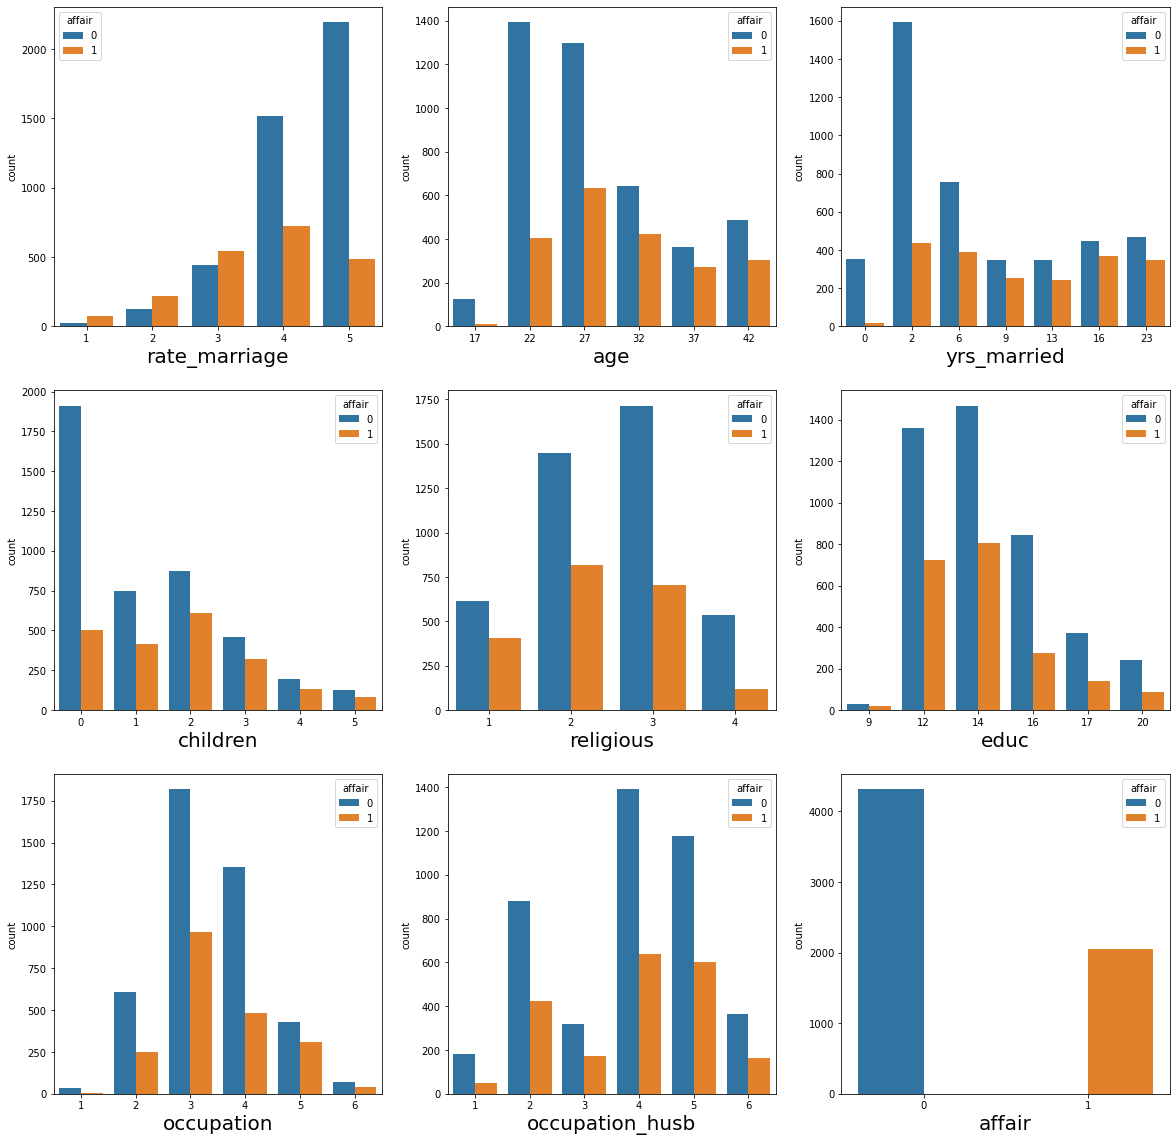

In [16]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=df.shape[1]:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[column],hue=df.affair)
        plt.xlabel(column,fontsize=20)
        plotnumber+=1

In [17]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  df, return_type="dataframe")


# rename column names for the dummy variables for better looks:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [18]:
X

,Intercept,C(occupation)[T.2],C(occupation)[T.3],C(occupation)[T.4],C(occupation)[T.5],C(occupation)[T.6],C(occupation_husb)[T.2],C(occupation_husb)[T.3],C(occupation_husb)[T.4],C(occupation_husb)[T.5],C(occupation_husb)[T.6],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.0,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.0,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.0,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [19]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [20]:
df['affair'].value_counts()


0    4313
1    2053
Name: affair, dtype: int64

In [21]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.071945,8.756362,1.380930,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.866715,7.394241,1.389855,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.000000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.000000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.000000,4.000000,20.000000,6.000000,6.000000,1.000000


In [22]:
df['yrs_married'].value_counts()


2     2034
6     1141
16     818
23     811
9      602
13     590
0      370
Name: yrs_married, dtype: int64

In [23]:
df['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [54]:
#The data is imbalanced

In [24]:
df.dtypes

rate_marriage      int32
age                int32
yrs_married        int32
children           int32
religious          int32
educ               int32
occupation         int32
occupation_husb    int32
affair             int32
dtype: object

In [25]:
print(f"% of people not having affair is {df['affair'].value_counts()[0]*100/df.shape[0]}")
print(f"% of people having affair is {df['affair'].value_counts()[1]*100/df.shape[0]}")

% of people not having affair is 67.75054979579014
% of people having affair is 32.249450204209865


Text(0, 0.5, 'frequency')

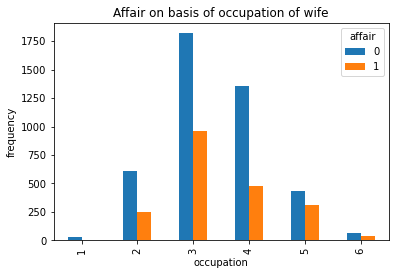

In [26]:

pd.crosstab(df.occupation,df.affair).plot(kind='bar')
plt.title("Affair on basis of occupation of wife")
plt.xlabel('occupation')
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

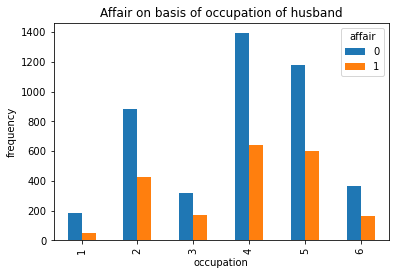

In [27]:
pd.crosstab(df.occupation_husb,df.affair).plot(kind='bar')
plt.title("Affair on basis of occupation of husband")
plt.xlabel('occupation')
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

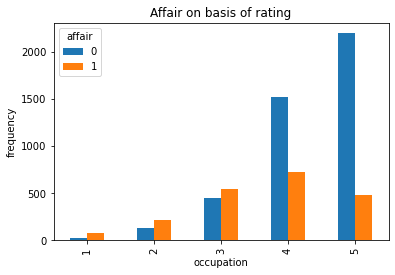

In [28]:
pd.crosstab(df.rate_marriage,df.affair).plot(kind='bar')
plt.title("Affair on basis of rating")
plt.xlabel('occupation')
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

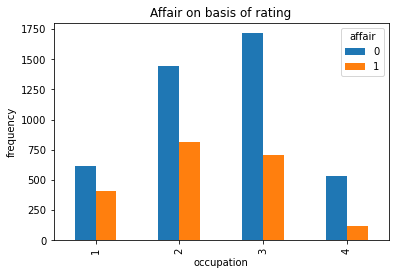

In [29]:

pd.crosstab(df.religious,df.affair).plot(kind='bar')
plt.title("Affair on basis of rating")
plt.xlabel('occupation')
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

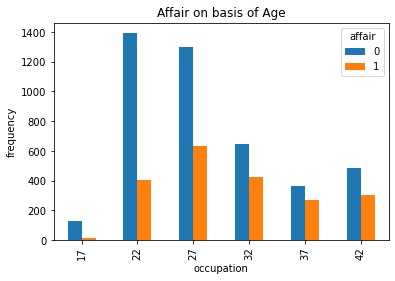

In [30]:
pd.crosstab(df.age,df.affair).plot(kind='bar')
plt.title("Affair on basis of Age")
plt.xlabel('occupation')
plt.ylabel("frequency")

In [31]:
X.drop(columns=['Intercept'],inplace=True)

In [32]:
X.head()

,C(occupation)[T.2],C(occupation)[T.3],C(occupation)[T.4],C(occupation)[T.5],C(occupation)[T.6],C(occupation_husb)[T.2],C(occupation_husb)[T.3],C(occupation_husb)[T.4],C(occupation_husb)[T.5],C(occupation_husb)[T.6],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.0,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.0,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [33]:
X.shape

(6366, 16)

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [35]:
X_scaled=sc.fit_transform(X.copy())


In [36]:

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif  

,vif,Features
0,19.340676,C(occupation)[T.2]
1,39.336105,C(occupation)[T.3]
2,32.931777,C(occupation)[T.4]
3,17.057890,C(occupation)[T.5]
4,3.697853,C(occupation)[T.6]
5,5.566994,C(occupation_husb)[T.2]
6,2.991284,C(occupation_husb)[T.3]
7,6.932028,C(occupation_husb)[T.4]
8,6.578494,C(occupation_husb)[T.5]
9,3.185715,C(occupation_husb)[T.6]


In [37]:
results=sm.Logit(y,X).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.544162
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6350
Method:                           MLE   Df Model:                           15
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:                  0.1345
Time:                        00:51:32   Log-Likelihood:                -3464.1
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                4.604e-220
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(occupation)[T.2]          2.6020      0.354      7.354      0.000       1.909       3.295
C(occupation)[T.3]          2.9112      0.349      8.351      0.000       2.228       3.594
C(occupation)[T.4]          2.6102      0.376      6.935      0.000       1.873       3.348
C(occupation)[T.5]          3.2395      0.365      8.885      0.000       2.525       3.954
C(occupation)[T.6]          3.1967      0.453      7.064      0.000       2.310       4.084
C(occupation_husb)[T.2]     0.3419      0.191      1.786      0.074      -0.033       0.717
C(occupation_husb)[T.3]     0.4500      0.207      2.172      0.030       0.044       0.856
C(occupation_husb)[T.4]     0.3069      0.187      1.644      0.100      -0.059       0.673
C(occupation_husb)[T.5]     0.3217      0.189      1.706      0.088      -0.048       0.691
C(occupation_husb)[T.6]     0.3102      0.209      1.482      0.138      -0.100       0.721
rate_marriage              -0.6847      0.031    -22.047      0.000      -0.746      -0.624
age                        -0.0524      0.010     -5.214      0.000      -0.072      -0.033
yrs_married                 0.0986      0.011      9.251      0.000       0.078       0.119
children                    0.0280      0.033      0.839      0.401      -0.037       0.093
religious                  -0.3642      0.035    -10.485      0.000      -0.432      -0.296
educ                        0.0223      0.017      1.316      0.188      -0.011       0.055
===========================================================================================
"""

In [38]:
X.drop(columns=['children'])

,C(occupation)[T.2],C(occupation)[T.3],C(occupation)[T.4],C(occupation)[T.5],C(occupation)[T.6],C(occupation_husb)[T.2],C(occupation_husb)[T.3],C(occupation_husb)[T.4],C(occupation_husb)[T.5],C(occupation_husb)[T.6],rate_marriage,age,yrs_married,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,3.0,17.0
6362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,16.0
6363,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.0,2.0,14.0
6364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,3.0,14.0


In [39]:
X_scaled=sc.fit_transform(X.copy())
vif2 = pd.DataFrame()
vif2["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif2["Features"] = X.columns

#let's check the values
vif2  

,vif,Features
0,19.340676,C(occupation)[T.2]
1,39.336105,C(occupation)[T.3]
2,32.931777,C(occupation)[T.4]
3,17.057890,C(occupation)[T.5]
4,3.697853,C(occupation)[T.6]
5,5.566994,C(occupation_husb)[T.2]
6,2.991284,C(occupation_husb)[T.3]
7,6.932028,C(occupation_husb)[T.4]
8,6.578494,C(occupation_husb)[T.5]
9,3.185715,C(occupation_husb)[T.6]


In [40]:
results=sm.Logit(y,X).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.544162
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6350
Method:                           MLE   Df Model:                           15
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:                  0.1345
Time:                        00:51:33   Log-Likelihood:                -3464.1
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                4.604e-220
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(occupation)[T.2]          2.6020      0.354      7.354      0.000       1.909       3.295
C(occupation)[T.3]          2.9112      0.349      8.351      0.000       2.228       3.594
C(occupation)[T.4]          2.6102      0.376      6.935      0.000       1.873       3.348
C(occupation)[T.5]          3.2395      0.365      8.885      0.000       2.525       3.954
C(occupation)[T.6]          3.1967      0.453      7.064      0.000       2.310       4.084
C(occupation_husb)[T.2]     0.3419      0.191      1.786      0.074      -0.033       0.717
C(occupation_husb)[T.3]     0.4500      0.207      2.172      0.030       0.044       0.856
C(occupation_husb)[T.4]     0.3069      0.187      1.644      0.100      -0.059       0.673
C(occupation_husb)[T.5]     0.3217      0.189      1.706      0.088      -0.048       0.691
C(occupation_husb)[T.6]     0.3102      0.209      1.482      0.138      -0.100       0.721
rate_marriage              -0.6847      0.031    -22.047      0.000      -0.746      -0.624
age                        -0.0524      0.010     -5.214      0.000      -0.072      -0.033
yrs_married                 0.0986      0.011      9.251      0.000       0.078       0.119
children                    0.0280      0.033      0.839      0.401      -0.037       0.093
religious                  -0.3642      0.035    -10.485      0.000      -0.432      -0.296
educ                        0.0223      0.017      1.316      0.188      -0.011       0.055
===========================================================================================
"""

In [41]:
X.drop(columns=['children'],inplace=True)

In [42]:
results=sm.Logit(y,X).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.544217
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6351
Method:                           MLE   Df Model:                           14
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:                  0.1344
Time:                        00:51:33   Log-Likelihood:                -3464.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                7.296e-221
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(occupation)[T.2]          2.6324      0.352      7.468      0.000       1.942       3.323
C(occupation)[T.3]          2.9323      0.348      8.421      0.000       2.250       3.615
C(occupation)[T.4]          2.6381      0.375      7.026      0.000       1.902       3.374
C(occupation)[T.5]          3.2611      0.364      8.953      0.000       2.547       3.975
C(occupation)[T.6]          3.2196      0.452      7.119      0.000       2.333       4.106
C(occupation_husb)[T.2]     0.3477      0.191      1.817      0.069      -0.027       0.723
C(occupation_husb)[T.3]     0.4536      0.207      2.189      0.029       0.047       0.860
C(occupation_husb)[T.4]     0.3128      0.187      1.676      0.094      -0.053       0.678
C(occupation_husb)[T.5]     0.3268      0.189      1.733      0.083      -0.043       0.696
C(occupation_husb)[T.6]     0.3161      0.209      1.510      0.131      -0.094       0.726
rate_marriage              -0.6859      0.031    -22.101      0.000      -0.747      -0.625
age                        -0.0527      0.010     -5.249      0.000      -0.072      -0.033
yrs_married                 0.1028      0.009     10.892      0.000       0.084       0.121
religious                  -0.3618      0.035    -10.453      0.000      -0.430      -0.294
educ                        0.0209      0.017      1.242      0.214      -0.012       0.054
===========================================================================================
"""

In [43]:
X.drop(columns=['educ'],inplace=True)

In [44]:
results=sm.Logit(y,X).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.544338
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6352
Method:                           MLE   Df Model:                           13
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:                  0.1342
Time:                        00:51:33   Log-Likelihood:                -3465.3
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                1.681e-221
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(occupation)[T.2]          2.8450      0.312      9.126      0.000       2.234       3.456
C(occupation)[T.3]          3.1498      0.305     10.332      0.000       2.552       3.747
C(occupation)[T.4]          2.9017      0.314      9.250      0.000       2.287       3.517
C(occupation)[T.5]          3.4900      0.318     10.976      0.000       2.867       4.113
C(occupation)[T.6]          3.5168      0.387      9.081      0.000       2.758       4.276
C(occupation_husb)[T.2]     0.3354      0.192      1.748      0.080      -0.041       0.711
C(occupation_husb)[T.3]     0.4451      0.208      2.142      0.032       0.038       0.852
C(occupation_husb)[T.4]     0.3067      0.187      1.638      0.101      -0.060       0.674
C(occupation_husb)[T.5]     0.3254      0.189      1.719      0.086      -0.046       0.696
C(occupation_husb)[T.6]     0.3295      0.210      1.572      0.116      -0.081       0.740
rate_marriage              -0.6841      0.031    -22.050      0.000      -0.745      -0.623
age                        -0.0498      0.010     -5.096      0.000      -0.069      -0.031
yrs_married                 0.0996      0.009     10.959      0.000       0.082       0.117
religious                  -0.3609      0.035    -10.424      0.000      -0.429      -0.293
===========================================================================================
"""

In [45]:
X.drop(columns=['C(occupation_husb)[T.2]','C(occupation_husb)[T.3]','C(occupation_husb)[T.4]','C(occupation_husb)[T.5]','C(occupation_husb)[T.6]'],inplace=True)

In [46]:

results=sm.Logit(y,X).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.544722
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:                  0.1336
Time:                        00:51:33   Log-Likelihood:                -3467.7
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                1.364e-225
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(occupation)[T.2]     3.1355      0.264     11.897      0.000       2.619       3.652
C(occupation)[T.3]     3.4403      0.258     13.349      0.000       2.935       3.945
C(occupation)[T.4]     3.1822      0.270     11.804      0.000       2.654       3.711
C(occupation)[T.5]     3.7717      0.274     13.758      0.000       3.234       4.309
C(occupation)[T.6]     3.7967      0.351     10.813      0.000       3.109       4.485
rate_marriage         -0.6853      0.031    -22.094      0.000      -0.746      -0.625
age                   -0.0485      0.010     -4.984      0.000      -0.068      -0.029
yrs_married            0.0997      0.009     10.953      0.000       0.082       0.118
religious             -0.3592      0.035    -10.391      0.000      -0.427      -0.291
======================================================================================
"""

In [47]:
X_scaled=sc.fit_transform(X.copy())
vif2 = pd.DataFrame()
vif2["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif2["Features"] = X.columns

#let's check the values
vif2  

,vif,Features
0,19.020733,C(occupation)[T.2]
1,38.832858,C(occupation)[T.3]
2,32.652718,C(occupation)[T.4]
3,16.896079,C(occupation)[T.5]
4,3.612648,C(occupation)[T.6]
5,1.032121,rate_marriage
6,5.113061,age
7,5.099658,yrs_married
8,1.030693,religious


In [48]:
X_scaled=sc.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [49]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

model.score(X_train, y_train)

0.7302052785923754

In [50]:
model.score(X_test, y_test)

0.7211055276381909

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
cm=confusion_matrix(y_test,model.predict(X_test))
cm

array([[970, 114],
       [330, 178]], dtype=int64)

In [53]:
cr=classification_report(y_test,model.predict(X_test))
print(cr)

              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81      1084
         1.0       0.61      0.35      0.44       508

    accuracy                           0.72      1592
   macro avg       0.68      0.62      0.63      1592
weighted avg       0.70      0.72      0.70      1592

